In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import os

In [2]:
# DATA

# import

file_path = os.path.join(r'D:\FMF magisterij\Matematika z računalnikom', f'test_weather_data.csv')
data = pd.read_csv(file_path)
data = pd.read_csv(file_path)

data.head()


,index,time,airT,rainIntensity,rH,solarRadiance,windDir,windSpeed,pressure
0,1133,2020-11-05 12:15:00+00:00,10.9,0.0,76.4,111.4,233.0,1.13,99010.0
1,1134,2020-11-05 12:20:00+00:00,10.9,0.0,76.7,115.5,245.0,1.17,99010.0
2,1135,2020-11-05 12:25:00+00:00,11.0,0.0,75.5,117.2,243.0,1.64,99010.0
3,1136,2020-11-05 12:30:00+00:00,11.0,0.0,76.0,118.8,226.0,1.54,99000.0
4,1137,2020-11-05 12:35:00+00:00,11.0,0.0,74.2,120.4,221.0,1.90,99000.0


In [3]:
# Rename columns to match the old format
new_data = data.rename(columns={
    'time': 'acquisition_timestamp',
    'airT': 'AMBIENT_TEMPERATURE',
    'rainIntensity': 'RAIN_INTENSITY',
    'rH': 'RELATIVE_HUMIDITY',
    'solarRadiance': 'SOLAR_RADIATION_INTENSITY',
    'windDir': 'WIND_DIRECTION',
    'windSpeed': 'WIND_SPEED',
    'pressure': 'AIR_PRESSURE'
})

# Convert acquisition_timestamp to datetime
new_data['acquisition_timestamp'] = pd.to_datetime(new_data['acquisition_timestamp'], utc=True)


# Drop the 'index' column
new_data = new_data.drop(columns=['index'])

# Set the 'acquisition_timestamp' as the index
new_data = new_data.set_index('acquisition_timestamp')

# Rearrange columns to match the old format
new_data = new_data[[
    'AIR_PRESSURE', 'AMBIENT_TEMPERATURE', 'RAIN_INTENSITY', 
    'RELATIVE_HUMIDITY', 'SOLAR_RADIATION_INTENSITY', 
    'WIND_DIRECTION', 'WIND_SPEED'
]]

# Display the reformatted DataFrame
new_data.head()


,AIR_PRESSURE,AMBIENT_TEMPERATURE,RAIN_INTENSITY,RELATIVE_HUMIDITY,SOLAR_RADIATION_INTENSITY,WIND_DIRECTION,WIND_SPEED
acquisition_timestamp,,,,,,,
2020-11-05 12:15:00+00:00,99010.0,10.9,0.0,76.4,111.4,233.0,1.13
2020-11-05 12:20:00+00:00,99010.0,10.9,0.0,76.7,115.5,245.0,1.17
2020-11-05 12:25:00+00:00,99010.0,11.0,0.0,75.5,117.2,243.0,1.64
2020-11-05 12:30:00+00:00,99000.0,11.0,0.0,76.0,118.8,226.0,1.54
2020-11-05 12:35:00+00:00,99000.0,11.0,0.0,74.2,120.4,221.0,1.90


In [4]:



# ambient temperature
temperature = new_data[['AMBIENT_TEMPERATURE']]
print(temperature)

# count the NaN values
nan_count_temperature = temperature['AMBIENT_TEMPERATURE'].isna().sum()
print(f'Nan Count Temperature :',nan_count_temperature)
# there are no NaN values

# check for missing measurements (skipped times)
complete_range = pd.date_range(start=temperature.index.min(), end=temperature.index.max(), freq='5T')
missing_timestamps = complete_range.difference(temperature.index)
print(f'Length of missing timestamps :',len(missing_timestamps))
#print(complete_range)
df_complete_range = pd.DataFrame(index=complete_range)
print(f'Data Complete Range :',len(df_complete_range))
# we have 271508 measurements, there are 5112 missing measurment out of 276620 time steps in the whole time range

# merge all the air pressure measurements with all the time steps. missing measurment will be NaN values for now
temperature_incomplete = df_complete_range.merge(temperature, left_index=True, right_index=True, how='left')
# print(temperature_incomplete)
temperature_incomplete.isna().sum() # okay

# missing measurements are filled with the next available measurement
temperature_all = temperature_incomplete.bfill()
print(f'Temperature all :',temperature_all)
print(f'Sum of na Tempertaure all :',temperature_all.isna().sum()) # okay

str(temperature_all.index.dtype) # okay

                           AMBIENT_TEMPERATURE
acquisition_timestamp                         
2020-11-05 12:15:00+00:00                 10.9
2020-11-05 12:20:00+00:00                 10.9
2020-11-05 12:25:00+00:00                 11.0
2020-11-05 12:30:00+00:00                 11.0
2020-11-05 12:35:00+00:00                 11.0
...                                        ...
2023-05-31 21:35:00+00:00                 15.1
2023-05-31 21:40:00+00:00                 15.0
2023-05-31 21:45:00+00:00                 15.1
2023-05-31 21:50:00+00:00                 15.0
2023-05-31 21:55:00+00:00                 14.9

[265803 rows x 1 columns]
Nan Count Temperature : 6
Length of missing timestamps : 4170
Data Complete Range : 269973
Temperature all :                            AMBIENT_TEMPERATURE
2020-11-05 12:15:00+00:00                 10.9
2020-11-05 12:20:00+00:00                 10.9
2020-11-05 12:25:00+00:00                 11.0
2020-11-05 12:30:00+00:00                 11.0
2020-11-05 12:35:0

'datetime64[ns, UTC]'

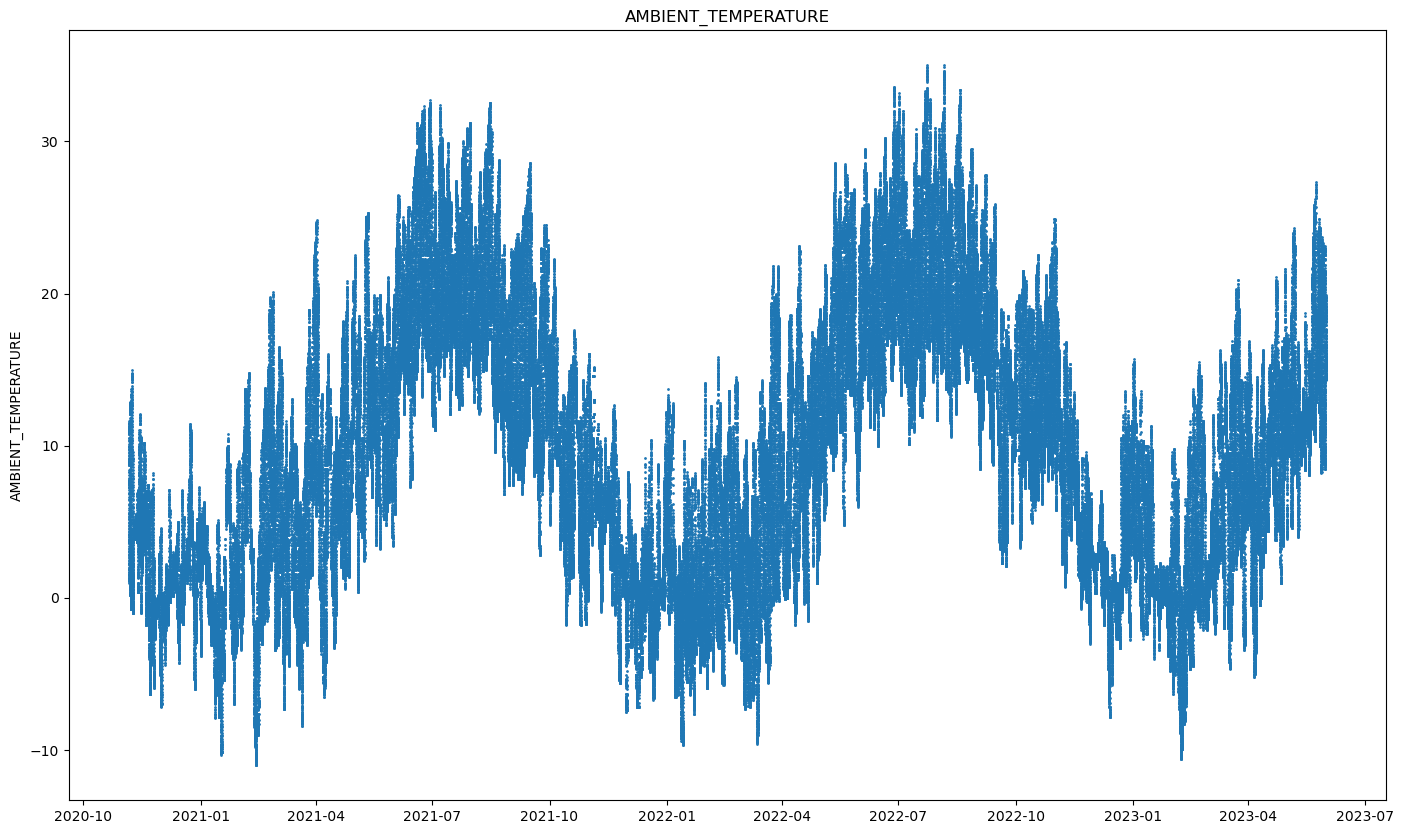

In [5]:
# plot 'AMMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(temperature_all.index, temperature_all['AMBIENT_TEMPERATURE'],s=1)
ax.set_ylabel('AMBIENT_TEMPERATURE')  
ax.set_title('AMBIENT_TEMPERATURE')  
plt.show()

                           AMBIENT_TEMPERATURE
2020-11-05 12:00:00+00:00            11.000000
2020-11-05 13:00:00+00:00            11.375000
2020-11-05 14:00:00+00:00            11.000000
2020-11-05 15:00:00+00:00            10.166667
2020-11-05 16:00:00+00:00             9.233333
...                                        ...
2023-05-31 17:00:00+00:00            17.608333
2023-05-31 18:00:00+00:00            16.600000
2023-05-31 19:00:00+00:00            15.808333
2023-05-31 20:00:00+00:00            15.458333
2023-05-31 21:00:00+00:00            15.116667

[22498 rows x 1 columns]


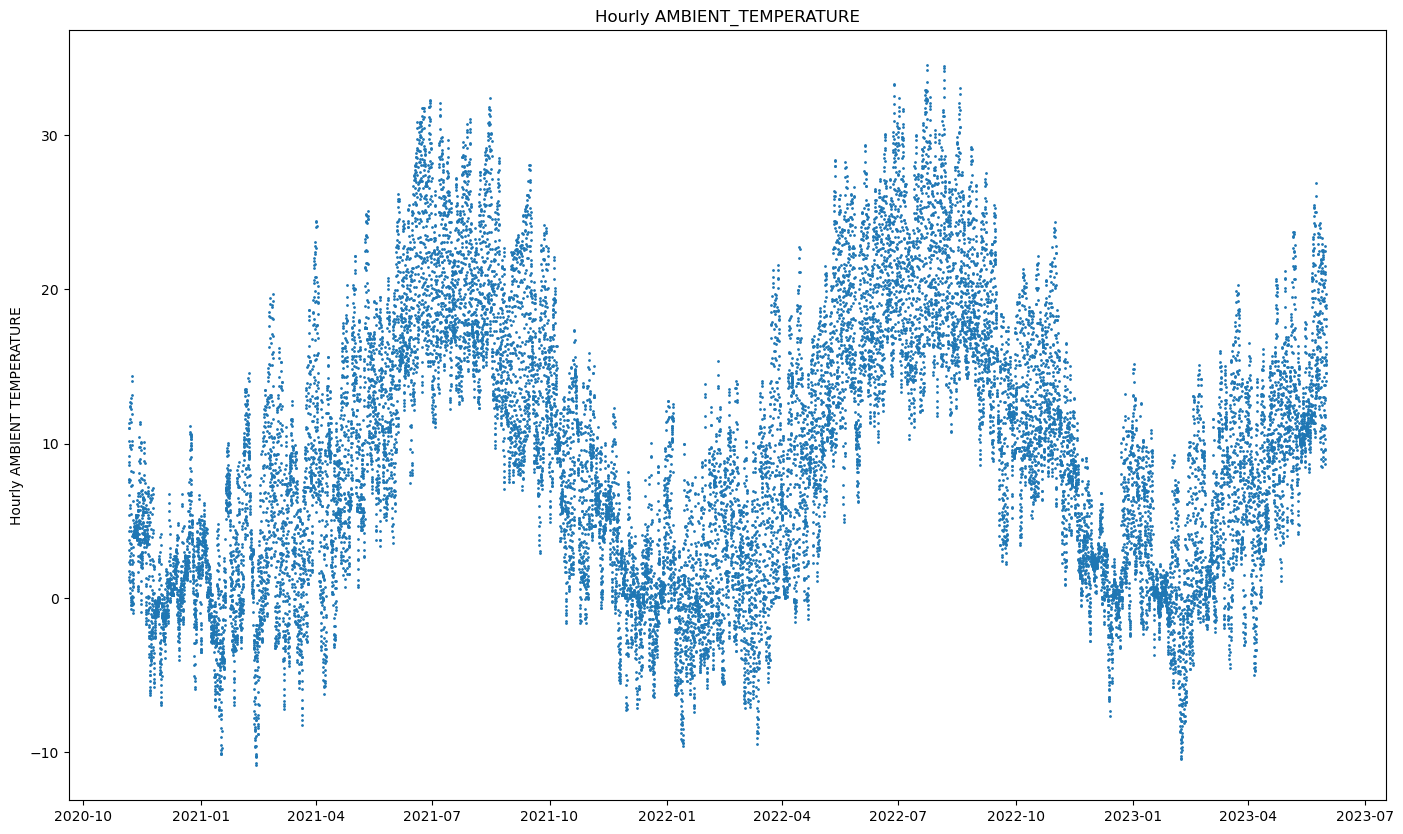

In [6]:
# hourly data
# sum the values for each hour and take the mean

str(temperature_all.index.dtype) # okay
temperature_hourly = temperature_all.resample('H').mean()
print(temperature_hourly)

# plot hourly 'AMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(temperature_hourly.index, temperature_hourly['AMBIENT_TEMPERATURE'],s=1)
ax.set_ylabel('Hourly AMBIENT TEMPERATURE')  
ax.set_title('Hourly AMBIENT_TEMPERATURE')  
plt.show()

In [7]:
# fit the old models to the new data 


from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# fits
order_1=(2,1,5)
order_2=(4,1,2)


                                SARIMAX Results                                
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                22498
Model:                  ARIMA(2, 1, 5)   Log Likelihood              -26152.678
Date:                 Mon, 20 May 2024   AIC                          52321.356
Time:                         20:20:48   BIC                          52385.525
Sample:                     11-05-2020   HQIC                         52342.231
                          - 05-31-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9132      0.002   1048.333      0.000       1.910       1.917
ar.L2         -0.9787      0.002   -550.325      0.000      -0.982      -0.975
ma.L1         -1.2529      0.004   -284.225 

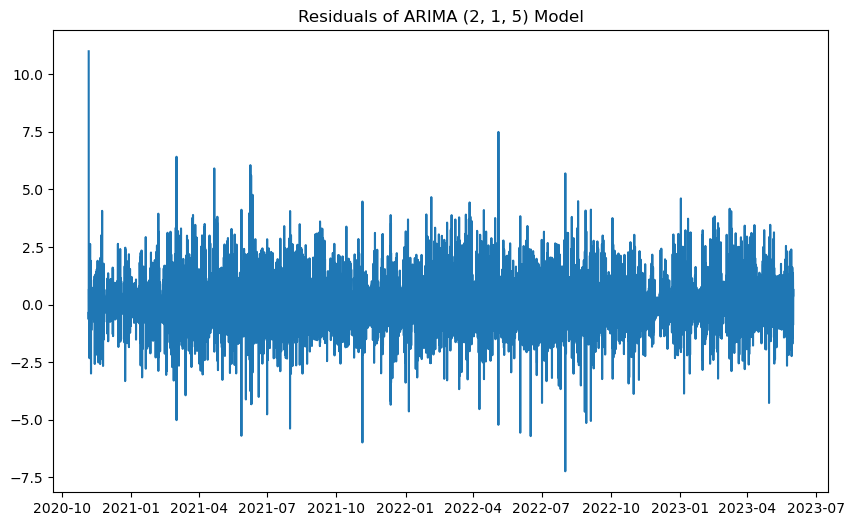

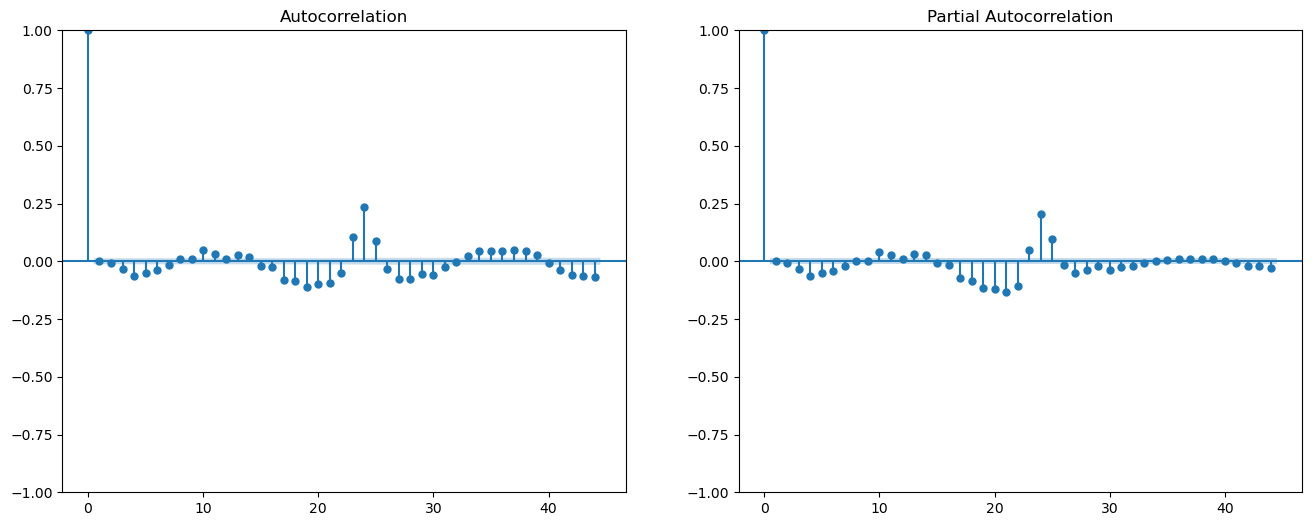

In [8]:

# fit the model number 1
best_model_1 = ARIMA(temperature_hourly, order=order_1)   # change order accordingly
best_fit_1 = best_model_1.fit()

# summary of the best model
print(best_fit_1.summary())

# residuals of the best model
residuals_best_1 = best_fit_1.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_1)
plt.title(f'Residuals of ARIMA {order_1} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_1, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_1, ax=ax[1], alpha=0.05)
plt.show()

                                SARIMAX Results                                
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                22498
Model:                  ARIMA(4, 1, 2)   Log Likelihood              -26112.554
Date:                 Mon, 20 May 2024   AIC                          52239.109
Time:                         20:21:02   BIC                          52295.257
Sample:                     11-05-2020   HQIC                         52257.375
                          - 05-31-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5137      0.006    423.126      0.000       2.502       2.525
ar.L2         -2.3439      0.012   -192.258      0.000      -2.368      -2.320
ar.L3          1.0006      0.012     83.904 

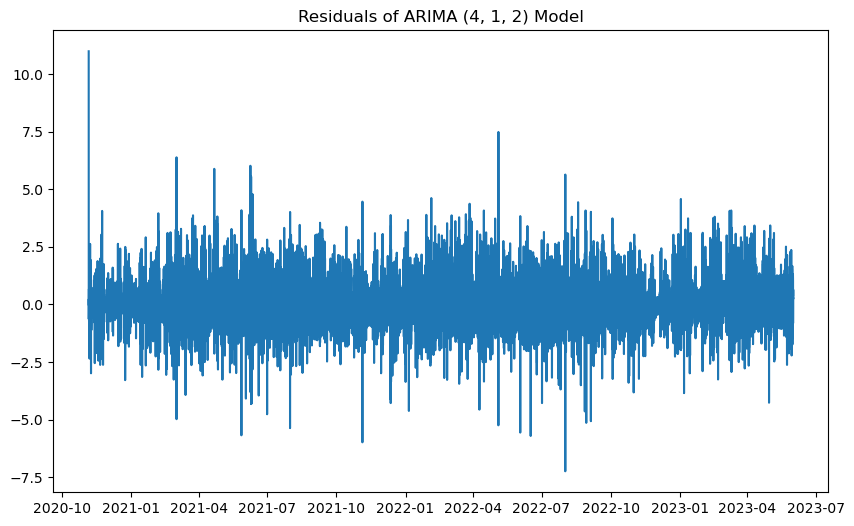

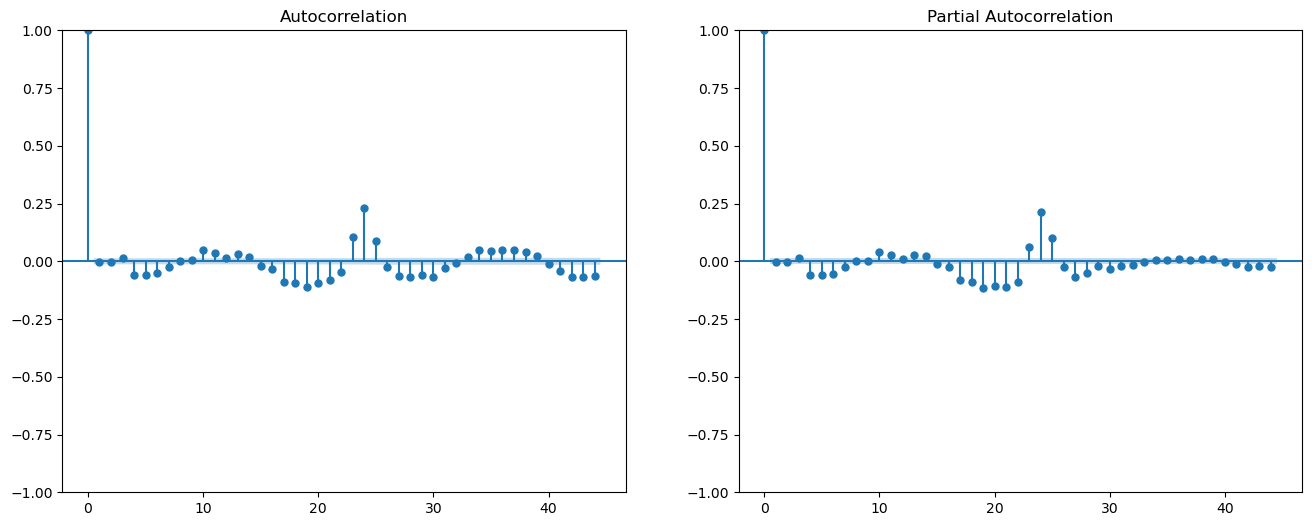

In [9]:
# fit the model number 2
best_model_2 = ARIMA(temperature_hourly, order=order_2)   # change order accordingly
best_fit_2 = best_model_2.fit()

# summary of the best model
print(best_fit_2.summary())

# residuals of the best model
residuals_best_2 = best_fit_2.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_2)
plt.title(f'Residuals of ARIMA {order_2} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_2, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_2, ax=ax[1], alpha=0.05)
plt.show()